# Wykrywanie anomalii sieciowy

## 1 Podstawy

- Obliczenia numeryczne
- Czytanie danych
- Wizualizacja

## Plan

- Wprowadzenie 15 min
- Czytanie danych 20 min
- Wizualziacja 20 min
- Obliczania 25 min
- Podsumowanie 10 min

# MRTG Format

Format plików *mrtg-logfile*  cytowany z  https://oss.oetiker.ch/mrtg/doc/mrtg-logfile.en.html

## The first Line

The first line has 3 numbers which are:

### A (1st column)

A timestamp of when MRTG last ran for this interface. The timestamp is the number of non-skip seconds passed since the standard UNIX "epoch" of midnight on 1st of January 1970 GMT.

### B (2nd column)
The "incoming bytes counter" value.

### C (3rd column)
The "outgoing bytes counter" value.

## The rest of the File

The second and remaining lines of the file contains 5 numbers which are:

### A (1st column)
The Unix timestamp for the point in time the data on this line is relevant. Note that the interval between timestamps increases as you progress through the file. At first it is 5 minutes and at the end it is one day between two lines.

### B (2nd column)

The average incoming transfer rate in bytes per second. This is valid for the time between the A value of the current line and the A value of the previous line.

### C (3rd column)

The average outgoing transfer rate in bytes per second since the previous measurement.

### D (4th column)

The maximum incoming transfer rate in bytes per second for the current interval. This is calculated from all the updates which have occured in the current interval. If the current interval is 1 hour, and updates have occured every 5 minutes, it will be the biggest 5 minute transfer rate seen during the hour.

### E (5th column)

The maximum outgoing transfer rate in bytes per second for the current interval.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import jax
import jax.numpy as jnp

# Czytanie danych

In [2]:
counters = pd.read_csv('../data/ucirtr-cyfronet.log')

In [3]:
#HIDE2SCIW58XNS
counters = pd.read_csv('../data/ucirtr-cyfronet.log', skiprows=1,sep=' ',
            names=['timestamp','incoming','outgoing','maximum incoming','maximum outgoing'])
counters.head()

,timestamp,incoming,outgoing,maximum incoming,maximum outgoing
0,1574068803,154331882,36341859,154331882,36341859
1,1574068503,150211888,41255850,150211888,41255850
2,1574068500,150057948,41266531,150211888,42056988
3,1574068200,138856229,42005252,152899249,42056988
4,1574067900,152667717,38159916,152899249,38176856


Zamieńmy `timestamp` na opdowiedni typ

In [4]:
#HIDE2SCIW58XNS

counters.timestamp = pd.to_datetime(counters.timestamp, unit='s')
counters.head()

,timestamp,incoming,outgoing,maximum incoming,maximum outgoing
0,2019-11-18 09:20:03,154331882,36341859,154331882,36341859
1,2019-11-18 09:15:03,150211888,41255850,150211888,41255850
2,2019-11-18 09:15:00,150057948,41266531,150211888,42056988
3,2019-11-18 09:10:00,138856229,42005252,152899249,42056988
4,2019-11-18 09:05:00,152667717,38159916,152899249,38176856


## Index

In [5]:
#HIDE2SCIW58XNS

counters.set_index('timestamp',inplace=True)
counters.head()

,incoming,outgoing,maximum incoming,maximum outgoing
timestamp,,,,
2019-11-18 09:20:03,154331882,36341859,154331882,36341859
2019-11-18 09:15:03,150211888,41255850,150211888,41255850
2019-11-18 09:15:00,150057948,41266531,150211888,42056988
2019-11-18 09:10:00,138856229,42005252,152899249,42056988
2019-11-18 09:05:00,152667717,38159916,152899249,38176856


Indeksowanie:

In [6]:
#HIDE2SCIW58XNS
counters['incoming'],\
counters.loc[pd.to_datetime('2019-11-18 08:25:00'),'incoming'],\
counters.iloc[4,2]

(timestamp
 2019-11-18 09:20:03    154331882
 2019-11-18 09:15:03    150211888
 2019-11-18 09:15:00    150057948
 2019-11-18 09:10:00    138856229
 2019-11-18 09:05:00    152667717
                          ...    
 2017-09-17 00:00:00     10170789
 2017-09-16 00:00:00     26632779
 2017-09-15 00:00:00     28299196
 2017-09-14 00:00:00     38873001
 2017-09-13 00:00:00     40292444
 Name: incoming, Length: 2536, dtype: int64,
 74457450,
 152899249)

# Wizualizacja

Pandas oferuje podstawową wizualizację, ale jak chcemy dopracowac szczegóły to trzeba ręcznie

<Axes: xlabel='timestamp'>

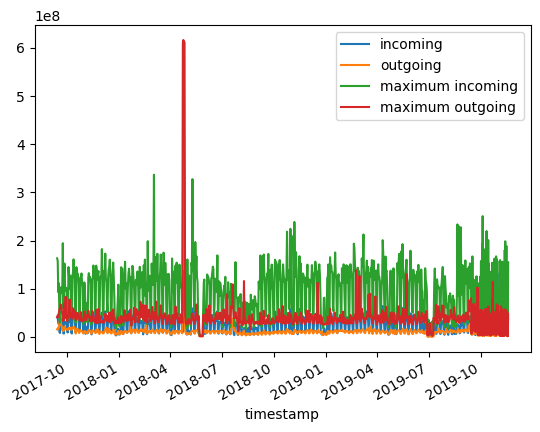

In [7]:
counters.plot()

### Wykres liniowy

Text(0.5, 0, 't')

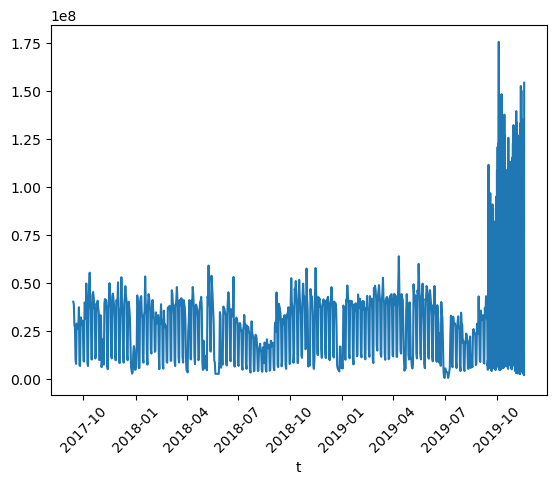

In [8]:
#HIDE2SCIW58XNS
plt.plot(counters.index,counters.incoming)
plt.xticks(rotation=45)
plt.xlabel('t')

In [9]:
#TODO

### Wykresy rozkładów

{'whiskers': [<matplotlib.lines.Line2D at 0x175ca477880>,
 'caps': [<matplotlib.lines.Line2D at 0x175ca4704c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x175ca44d940>],
 'medians': [<matplotlib.lines.Line2D at 0x175ca447190>],
 'fliers': [<matplotlib.lines.Line2D at 0x175ca4475b0>],
 'means': []}

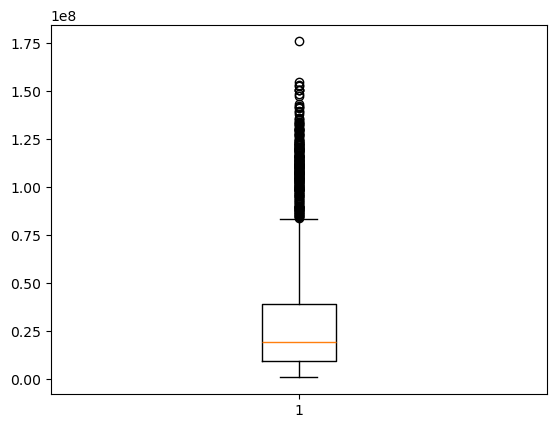

In [10]:
#HIDE2SCIW58XNS
plt.boxplot(counters.incoming)

In [11]:
#TODO

(array([1.223e+03, 5.710e+02, 3.690e+02, 6.700e+01, 7.000e+01, 7.900e+01,
        1.100e+02, 3.400e+01, 1.200e+01, 1.000e+00]),
 array([6.20444000e+05, 1.81136682e+07, 3.56068924e+07, 5.31001166e+07,
        7.05933408e+07, 8.80865650e+07, 1.05579789e+08, 1.23073013e+08,
        1.40566238e+08, 1.58059462e+08, 1.75552686e+08]),
 <BarContainer object of 10 artists>)

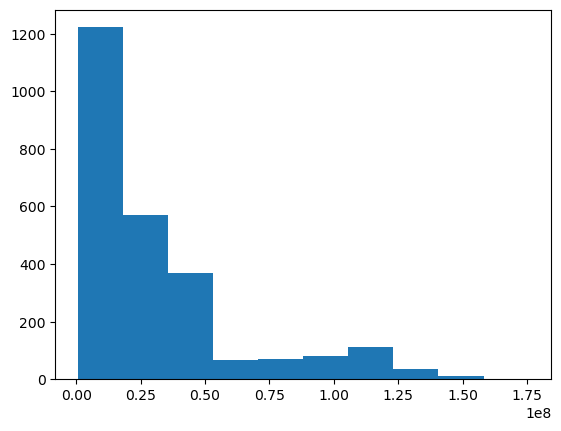

In [12]:
#HIDE2SCIW58XNS
plt.hist(counters.incoming)

In [13]:
#TODO

### Wykresy rozrzutu (relacji)

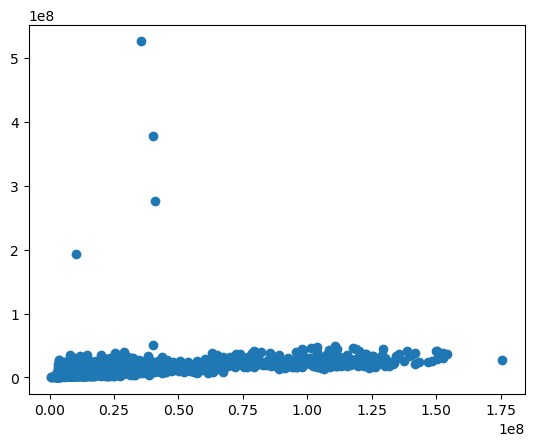

In [14]:
#HIDE2SCIW58XNS
plt.scatter(x=counters.incoming, y=counters.outgoing)

In [15]:
#TODO

### Seaborn

Wizualizacja statystyczna

```
sns.set()
```
dla ładniejszych wykresów

<Axes: xlabel='incoming', ylabel='outgoing'>

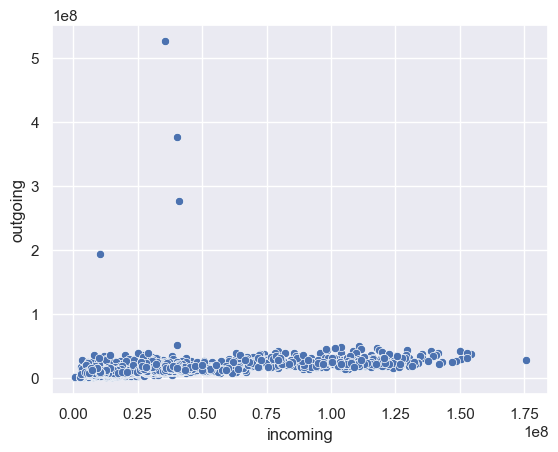

In [16]:
sns.set()
sns.scatterplot(data=counters,x='incoming',y='outgoing')

c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


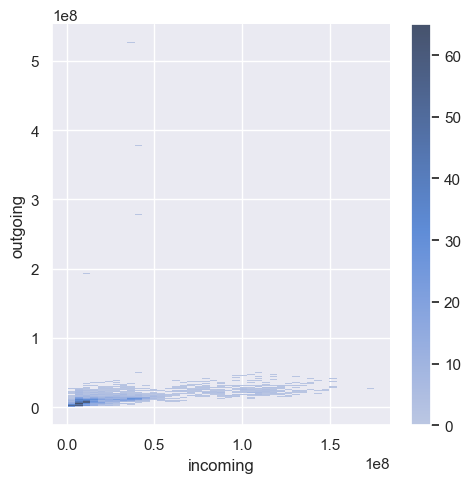

In [17]:
sns.displot(data=counters,x='incoming',y='outgoing', cbar=True)

Zaznaczmy dane nowsze niż `2019-1-18 08:25:00` innym kolorem

c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\krzys\miniconda3\envs\anomalie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupi

<Axes: xlabel='timestamp', ylabel='incoming'>

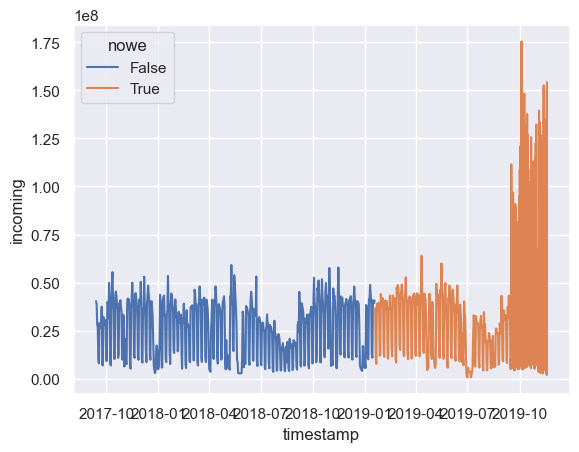

In [18]:
#HIDE2SCIW58XNS
df = counters.copy()
df['nowe'] = df.index > pd.to_datetime('2019-1-18 08:25:00')
df.head()

sns.lineplot(x='timestamp',y='incoming', hue='nowe', data=df)

In [19]:
#TODO

# Programowanie tablicowe

Programowanie tablicowe jest podstawowym API w bibliotekach do uczenia maszynowego i analizy dnaych.

- Tablice wielowymiarowe, generalizacja macierzy i wektorów
- `numpy`
- `jax`

In [20]:
t = counters.index.astype(np.int64)

In [21]:
[np.mean(t), np.std(t),...]

[1.562319068969243e+18, 1.9013402207785144e+16, Ellipsis]

In [22]:
np.unique(np.diff(t))

array([-86400000000000, -64800000000000,  -7200000000000,  -3600000000000,
        -1800000000000,  -1200000000000,   -300000000000,     -3000000000],
      dtype=int64)

In [23]:
pd.to_timedelta(-np.unique(np.diff(t)))

TimedeltaIndex(['1 days 00:00:00', '0 days 18:00:00', '0 days 02:00:00',
                '0 days 01:00:00', '0 days 00:30:00', '0 days 00:20:00',
                '0 days 00:05:00', '0 days 00:00:03'],
               dtype='timedelta64[ns]', freq=None)

### Brodcast

In [24]:
u = np.unique(np.diff(t))
print(u.shape)
delta = np.diff(t)
print(delta.shape)

(8,)
(2535,)


In [25]:
eq = u[..., np.newaxis]==delta
print(eq.shape)
print(eq[0,:])
print(eq[0,-1])

(8, 2535)
[False False False ...  True  True  True]
True


In [26]:
np.sum(eq,axis=1)

array([731,   1, 600,   1, 600,   1, 600,   1])

Narysujmy zliczenia

<Axes: xlabel='czas'>

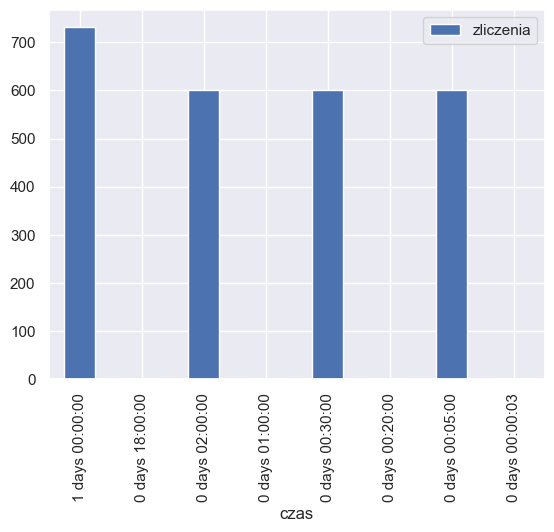

In [27]:
pd.DataFrame(dict(zliczenia = np.sum(eq,axis=1), czas=pd.to_timedelta(-u ))).set_index('czas').plot.bar()

Widzimy, że zgodnie z dokumentacją mamy kilka grup pomiarów co:

- 5 min
- 30 min
- 2h
- 1 dzień

Da każdej grupy mamy ok 600 pomiarów.
Jaki jest łączny zakres logu?

## 30 min

Wybrać tylko te pliki, które maja pomiary co 30 min

In [28]:
#HIDE2SCIW58XNS
df = counters.copy()
df = df.sort_values(by='timestamp')

idx=np.abs(np.diff(df.index)-pd.to_timedelta(30,unit='min')) < pd.to_timedelta(30,unit='s')
idx = np.concatenate([np.array([False]),idx], axis=0)
np.sum(idx)

600

In [29]:
#HIDE2SCIW58XNS
df30min = df.iloc[idx,1]
df30min.head()

a = df30min.to_numpy()
t = (df30min.index-df30min.index[0])/pd.to_timedelta(1,unit='h')

Text(0.5, 0, 't [h]')

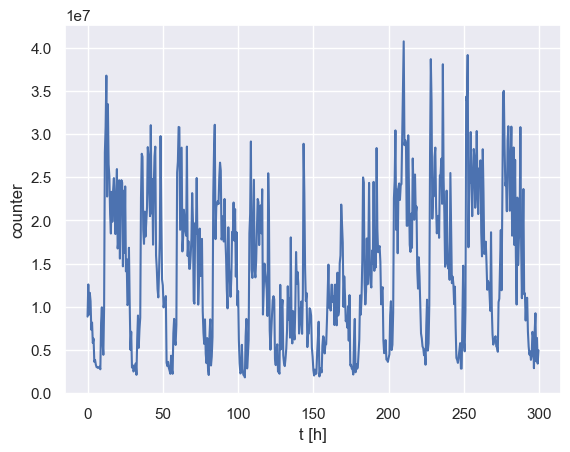

In [30]:
plt.plot(t,a)
plt.ylabel('counter')
plt.xlabel('t [h]')

Wykres w skali logarytmiczne

Text(0.5, 0, 't [h]')

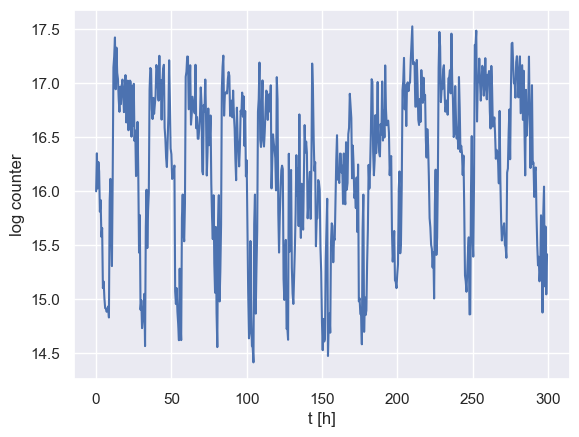

In [31]:
plt.plot(t,np.log(a))
plt.ylabel('log counter')
plt.xlabel('t [h]')

## Periodyczność

Przerowadżmy analiże okresowości w danych

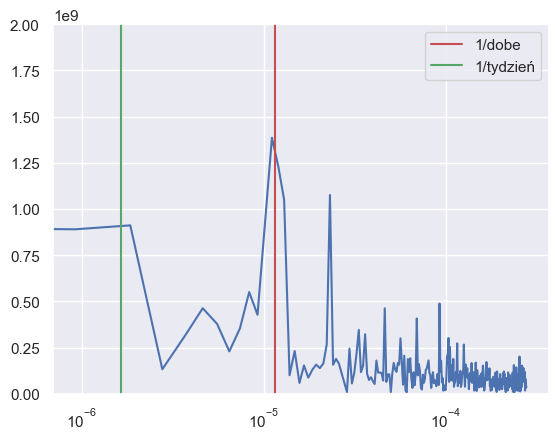

In [32]:
#HIDE2SCIW58XNS

spectrum=np.fft.rfft(a)
n = a.size
timestep = 0.5*60*60 # 0.5h w s

freq = np.fft.rfftfreq(n, d=timestep)

plt.plot(freq,(np.abs(spectrum)))
plt.xscale('log')
plt.axvline(x=1/(24*60*60),label='1/dobe',color='r')
plt.axvline(x=1/(7*24*60*60),label='1/tydzień',color='g')
plt.ylim(0,2e9)
plt.legend()
#plt.yscale('log')

# JAX

Uczenie masyznowe a szczególnie sieci neuronowe potrzebują gradientów (pochodnych)

Biblioteka daje takie możliwości i wiele innych

In [33]:
x = jnp.linspace(-2,2,100)

def sq(x):
    return x*x

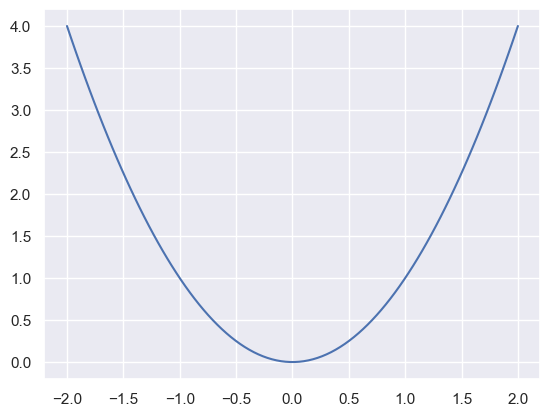

In [34]:
plt.plot(x,jax.vmap(sq)(x))

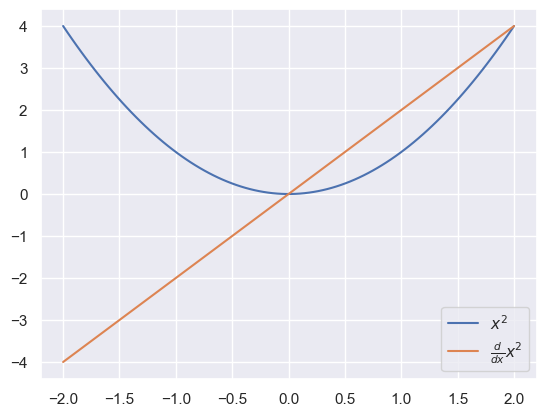

In [35]:
pochodna = jax.grad(sq)
pochodna = jax.vmap(pochodna)
pochodna = jax.jit(pochodna)

plt.plot(x,jax.vmap(sq)(x), label=r'$x^2$')
plt.plot(x,pochodna(x), label=r'$\frac{d}{dx}x^2$')
plt.legend()
